In [4]:
# Dataset Terapi
# Rules dan Deskripsi Dataset
# 1. Dataset ini sangat sedikit karena < 100 baris jadi diharapkan
#    TIDAK MENGHAPUS baris data.
# 2. Target atribut dataset ini sangat imbalance jadi silakan menggunakan berbagai
#    metode untuk menangani imbalance class
# 3. Untuk gender: 1 untuk male dan 2 untuk female
#    Untuk results: 0 untuk tidak ada kemajuan dan 1 untuk ada kemajuan
# 4. Silakan membangun model Machine Learning dengan task baik 
#    Classification, Regression, atau Clustering.
# 5. Silakan mengunggah notebook baik di e-learn maupun
#    di Github (online text). Pastikan sudah urut code cell-nya dan harus
#    sudah di- RUN ALL.

# Selamat mengerjakan.

# Import library

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

! pip install mlxtend
!pip install kneed
!pip install xlrd
!pip install imblearn
from sklearn.preprocessing import OneHotEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Load the data set and show the first ten data

In [6]:
url = "https://raw.githubusercontent.com/Inez-z/ALP_Inez/main/Dataset_Terapi_Kelenjar_Getah_Bening.csv"
df = pd.read_csv(url, sep=',')
df.head(10)

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
5,1,38,12.00,14.0,1.0,87,6.0,0
6,1,45,11.25,4.0,1.0,72,5.0,0
7,1,46,11.50,4.0,1.0,91,25.0,0
8,1,49,4.50,2.0,1.0,33,7.0,0
9,2,15,1.75,1.0,2.0,49,7.0,0


# EDA

#Describing the dataframe

In [7]:
df.describe()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
count,90.000000,90.000000,87.000000,89.000000,85.000000,90.000000,88.000000,90.000000
mean,1.544444,31.044444,7.221264,6.123596,1.752941,95.700000,14.500000,0.788889
std,0.500811,12.235435,3.151325,4.231431,0.829599,136.614643,17.378147,0.410383
min,1.000000,15.000000,1.000000,1.000000,1.000000,6.000000,2.000000,0.000000
25%,1.000000,20.250000,5.000000,2.000000,1.000000,35.500000,5.000000,1.000000
50%,2.000000,28.500000,7.750000,6.000000,2.000000,53.000000,7.000000,1.000000
75%,2.000000,41.750000,10.000000,9.000000,2.000000,80.750000,9.000000,1.000000
max,2.000000,56.000000,12.000000,19.000000,3.000000,900.000000,70.000000,1.000000


#Showing the correlation

In [8]:
df.corr()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
gender,1.000000,0.043682,-0.013800,0.107065,-0.082378,-0.115664,0.014528,0.018831
age,0.043682,1.000000,0.191086,0.001750,-0.044553,-0.064334,-0.020287,-0.188314
Time,-0.013800,0.191086,1.000000,0.042942,-0.269183,-0.046104,-0.196455,-0.364466
Number_of_Warts,0.107065,0.001750,0.042942,1.000000,0.155240,-0.112198,0.082438,-0.038395
Type,-0.082378,-0.044553,-0.269183,0.155240,1.000000,-0.058883,0.192486,0.089139
Area,-0.115664,-0.064334,-0.046104,-0.112198,-0.058883,1.000000,0.115783,0.043349
induration_diameter,0.014528,-0.020287,-0.196455,0.082438,0.192486,0.115783,1.000000,-0.026373
Result_of_Treatment,0.018831,-0.188314,-0.364466,-0.038395,0.089139,0.043349,-0.026373,1.000000


#Checking if there is a NaN value

In [9]:
df.isna().any()

gender                 False
age                    False
Time                    True
Number_of_Warts         True
Type                    True
Area                   False
induration_diameter     True
Result_of_Treatment    False
dtype: bool

#Find the total number of missing values from the entire dataset

In [10]:
df.isnull().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

Turns out there's quite a lot NaN values in the dataset, so we need to fill the NaN values

#Fill the missing values using KNNImputer

KNNImputer by scikit-learn is a widely used method to impute missing values. It is widely being observed as a replacement for traditional imputation techniques.

In [11]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

#Checking the dataframe

In [12]:
df

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1.0,15.0,11.00,6.0,1.0,30.0,25.0,0.0
1,1.0,27.0,11.75,2.6,1.0,208.0,6.0,0.0
2,1.0,32.0,12.00,9.0,1.0,43.0,50.0,0.0
3,1.0,33.0,1.75,7.0,2.0,379.0,7.0,0.0
4,1.0,34.0,5.00,7.0,3.0,64.0,7.0,0.0
...,...,...,...,...,...,...,...,...
85,2.0,51.0,4.00,1.0,1.0,65.0,7.0,1.0
86,2.0,51.0,6.00,6.0,1.6,80.0,2.0,1.0
87,2.0,52.0,2.25,5.0,1.0,63.0,7.0,1.0
88,2.0,53.0,10.00,1.0,2.0,30.0,25.0,1.0


# Checking if the dataframe still has  a NaN value

In [13]:
df.isna().any()

gender                 False
age                    False
Time                   False
Number_of_Warts        False
Type                   False
Area                   False
induration_diameter    False
Result_of_Treatment    False
dtype: bool

In [14]:
df.isna().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

Now the dataset has no missing values

# Oversampling with SMOTE method

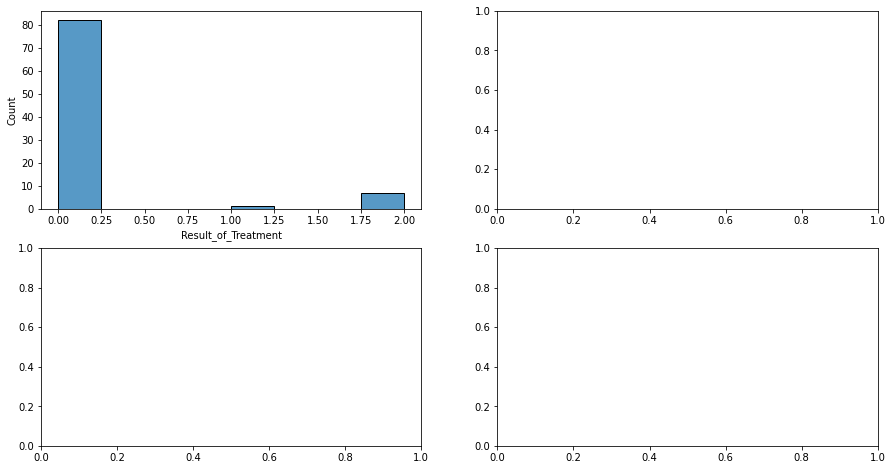

In [44]:
fig,axes = plt.subplots(2,2,figsize=(15,8))
sns.histplot(data=df,x='Result_of_Treatment',ax=axes[0,0])

In [16]:
from imblearn.over_sampling import SMOTE
a = df.drop(['Result_of_Treatment'],axis=1)
b = df['Result_of_Treatment']

In [17]:
sm = SMOTE(random_state=30)
x_sampling,y_sampling = sm.fit_resample(a,b)

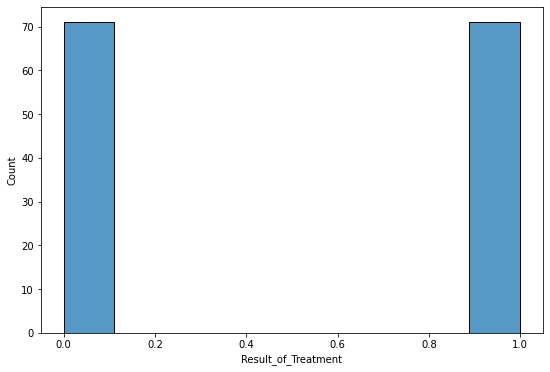

In [18]:
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=y_sampling)
plt.show()

# Separate dataset into independent and dependent variable

In [19]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, 1:-1]
y = df.Result_of_Treatment

# Separate train dataset and test dataset with test size 0.1 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1)

# Do the scaling feature on the X_train and X_test variables


In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Regression using Logistic Regression

# Build the model and measure the accuracy

In [22]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

#Test the model with a test dataset

In [23]:
y_pred = (classifier.predict(X_test))
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 1. 0.]


In [28]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix:  [[1 0]
 [1 7]]
Accuracy Score:  0.8888888888888888


# Classification using Naive Bayes

#Create an equation model based on the training data that was created at the preprocessing stage

In [25]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

# Test the model results with data test

In [26]:
y_pred = gnb.predict(X_test)
print(y_pred)

[1. 0. 0. 1. 1. 1. 1. 1. 1.]


# Measure the accuracy of the Naive Bayes Classifier equation model

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix:  [[1 0]
 [1 7]]
Accuracy Score:  0.8888888888888888


# Classification using KNN

#Create a KNN model based on the training data that was created in the preprocessing stage, using the 'euclidean' distance measurement metric

In [29]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
classifier.fit(X_train, y_train) 

KNeighborsClassifier(metric='euclidean')

#Test the model results with data test

In [30]:
y_pred = (classifier.predict(X_test))
print(y_pred)

[1. 0. 1. 1. 1. 1. 1. 1. 1.]


#Measure the accuracy of the K-Nearest Neighbor model

In [31]:
y_pred = classifier.predict(X_test)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix:  [[0 1]
 [1 7]]
Accuracy Score:  0.7777777777777778


#Clustering using Kmeans

# Set the parameter for evaluating K

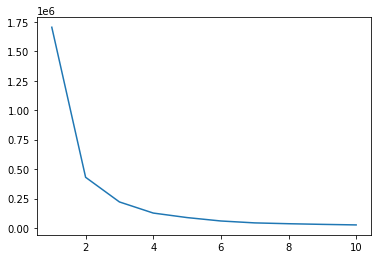

In [32]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle

wcss = []
for k in range(1,11):
    kmeans = KMeans(k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.show()

# Using kneelocator to find the elbow/knee

In [33]:
from kneed import KneeLocator
findknee = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
print("The best k for your model is ",findknee.elbow)

The best k for your model is  3


In [34]:
from sklearn.cluster import AgglomerativeClustering
threecl = AgglomerativeClustering(3)
cls = threecl.fit_predict(X)
df['Result_of_Treatment'] = cls
df

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1.0,15.0,11.00,6.0,1.0,30.0,25.0,0
1,1.0,27.0,11.75,2.6,1.0,208.0,6.0,0
2,1.0,32.0,12.00,9.0,1.0,43.0,50.0,0
3,1.0,33.0,1.75,7.0,2.0,379.0,7.0,1
4,1.0,34.0,5.00,7.0,3.0,64.0,7.0,0
...,...,...,...,...,...,...,...,...
85,2.0,51.0,4.00,1.0,1.0,65.0,7.0,0
86,2.0,51.0,6.00,6.0,1.6,80.0,2.0,0
87,2.0,52.0,2.25,5.0,1.0,63.0,7.0,0
88,2.0,53.0,10.00,1.0,2.0,30.0,25.0,0


# **Summary**

In [36]:
df["Result_of_Treatment"] = cls

df.groupby("Result_of_Treatment").agg(gender = ('gender', pd.Series.mode),
                                 age=('age', 'mean'),
                                 Time = ('Time', 'mean'),
                                 Number_of_Warts=('Number_of_Warts', 'mean'),
                                 Type = ("Type", 'mean'),
                                  Area = ("Area", 'mean'),
                                  induration_diameter = ("induration_diameter", 'mean'),
                                  Result_of_Treatment = ("Result_of_Treatment", 'count'))

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
Result_of_Treatment,,,,,,,,
0,2.0,31.060976,7.251220,6.117073,1.770732,58.560976,14.490244,82
1,1.0,33.142857,7.535714,6.285714,1.285714,415.857143,6.000000,7
2,1.0,15.000000,3.000000,2.000000,3.000000,900.000000,70.000000,1


#Hierarchical Clustering


#Hierarchical clustering using agglomerative method

#Plot Dendrogram helps to count cluster, using max method

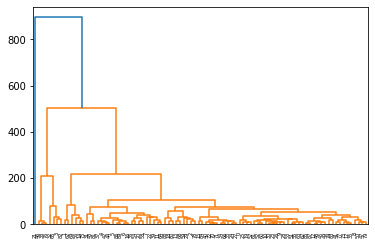

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram(linkage(X,method='complete'))
plt.show()

#Perform hierarchical clustering with the Euclidean metric and the number of clusters is the same as the Kmeans cluster

In [38]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='complete')
hie = hc.fit_predict(X)
df['Result_of_Treatment'] = hie
df.head(5)

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1.0,15.0,11.00,6.0,1.0,30.0,25.0,0
1,1.0,27.0,11.75,2.6,1.0,208.0,6.0,0
2,1.0,32.0,12.00,9.0,1.0,43.0,50.0,0
3,1.0,33.0,1.75,7.0,2.0,379.0,7.0,2
4,1.0,34.0,5.00,7.0,3.0,64.0,7.0,0


# **Summary**

In [40]:
df["Result_of_Treatment"] = hie

df.groupby("Result_of_Treatment").agg(gender = ('gender', pd.Series.mode),
                                 age=('age', 'mean'),
                                 Time = ('Time', 'mean'),
                                 Number_of_Warts=('Number_of_Warts', 'mean'),
                                 Type = ("Type", 'mean'),
                                  Area = ("Area", 'mean'),
                                  induration_diameter = ("induration_diameter", 'mean'),
                                  Result_of_Treatment = ("Result_of_Treatment", 'count'))

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
Result_of_Treatment,,,,,,,,
0,2.0,31.060976,7.251220,6.117073,1.770732,58.560976,14.490244,82
1,1.0,15.000000,3.000000,2.000000,3.000000,900.000000,70.000000,1
2,1.0,33.142857,7.535714,6.285714,1.285714,415.857143,6.000000,7
